## testing stuff    


In [1]:
import sympy as sy
import numpy as np
from IPython.display import display, Markdown ,  Math
import pprint as pp
import itertools 
import functools as ft
import scipy as sp
from matplotlib import pyplot as plt


v_VarN = ['S', 'C', 'r_S', 'r_C','alpha_C' , 'alpha_S', 'K' ] 
v_Syms = sy.symbols(v_VarN)
#Syms[s_S , s_C , s_r_S , s_r_C , s_alpha_C , s_alpha_S , s_K] = sy.symbols(Vars)

f_dSdt = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K : r_S * S * (K - S - alpha_C * C) * 1/K
f_dCdt = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K : r_C * C * (K - C - alpha_S * S) * 1/K

f_model = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K : [f_dSdt(t, S , C , r_S , r_C , alpha_C , alpha_S , K) , f_dCdt(t, S , C , r_S , r_C , alpha_C , alpha_S , K)]


In [2]:
#-> symbolic
fs_model = f_model(_,*v_Syms)

p_eq = sy.solve(fs_model,v_Syms[0:2])

sd_eq = {
        v_Syms[0] : p_eq[3][0] , 
        v_Syms[1] : p_eq[3][1] }

ev = sy.Matrix(fs_model).jacobian(v_Syms[0:2]).subs(sd_eq).eigenvals()


\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} - \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}
\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} + \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}


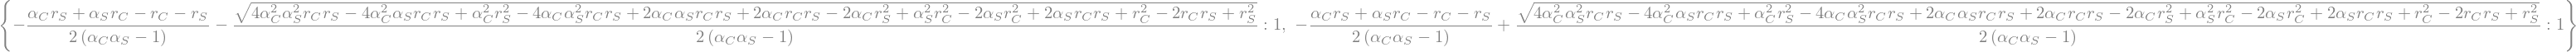

In [3]:
for p in ev:
    sy.init_printing(p.simplify())
    print(sy.latex(p.simplify()))

ev

In [4]:
for p in ev:
    sy.init_printing(p)
    print(sy.latex(p.simplify()))

\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} - \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}
\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} + \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}


## Punto de equilibiro de interés
### $\left( - \frac{K \left(alpha_{C} + 1\right)}{alpha_{C} alpha_{S} - 1}, \  \frac{- K alpha_{S} - K}{alpha_{C} alpha_{S} - 1}\right)$

## Autovalores
$\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} - \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}$
$\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} + \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}$


### simplify
$\frac{- \alpha_{C} r_{S} - \alpha_{S} r_{C} + r_{C} + r_{S} - \sqrt{4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2}}}{2 \left(\alpha_{C} \alpha_{S} - 1\right)}
$

### determinante
$4 \alpha_{C}^{2} \alpha_{S}^{2} r_{C} r_{S} - 4 \alpha_{C}^{2} \alpha_{S} r_{C} r_{S} + \alpha_{C}^{2} r_{S}^{2} - 4 \alpha_{C} \alpha_{S}^{2} r_{C} r_{S} + 2 \alpha_{C} \alpha_{S} r_{C} r_{S} + 2 \alpha_{C} r_{C} r_{S} - 2 \alpha_{C} r_{S}^{2} + \alpha_{S}^{2} r_{C}^{2} - 2 \alpha_{S} r_{C}^{2} + 2 \alpha_{S} r_{C} r_{S} + r_{C}^{2} - 2 r_{C} r_{S} + r_{S}^{2} $

In [5]:
#find complex solutions 
ev0 = list(ev.keys())[0]

In [6]:
def pre(expr):
    print(expr)
    for k in  expr.args:
        pre(k)

In [7]:
mem = 0
pre(ev0)
#ev0


-(alpha_C*r_S + alpha_S*r_C - r_C - r_S)/(2*(alpha_C*alpha_S - 1)) - sqrt(4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2)/(2*(alpha_C*alpha_S - 1))
-sqrt(4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2)/(2*(alpha_C*alpha_S - 1))
-1/2
1/(alpha_C*alpha_S - 1)
alpha_C*alpha_S - 1
-1
alpha_C*alpha_S
alpha_C
alpha_S
-1
sqrt(4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_

In [41]:
#estabilidad
# P polinomio cuadrático autoval p_eq^4
#b^2 > disc(P) ?

b2 = sy.parse_expr("(alpha_C*r_S + alpha_S*r_C - r_C - r_S)")
disc = sy.parse_expr( "4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2")
#eq = sy.Equality(b2**2-disc)

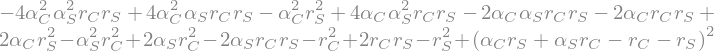

4*r_C*r_S*(-alpha_C**2*alpha_S**2 + alpha_C**2*alpha_S + alpha_C*alpha_S**2 - alpha_C - alpha_S + 1)


In [44]:
eqtest = b2**2-disc
sy.init_printing(eqtest)
display(eqtest)
display(eqtest.simplify())
print((eqtest.simplify()))


In [8]:
#discriminante
det = sy.parse_expr( "4*alpha_C**2*alpha_S**2*r_C*r_S - 4*alpha_C**2*alpha_S*r_C*r_S + alpha_C**2*r_S**2 - 4*alpha_C*alpha_S**2*r_C*r_S + 2*alpha_C*alpha_S*r_C*r_S + 2*alpha_C*r_C*r_S - 2*alpha_C*r_S**2 + alpha_S**2*r_C**2 - 2*alpha_S*r_C**2 + 2*alpha_S*r_C*r_S + r_C**2 - 2*r_C*r_S + r_S**2")

In [9]:
sd_det = {
    v_Syms[2] : 2.00        ,   # r_S
    v_Syms[3] : 2.50        ,   # r_C
    v_Syms[4] : 1.00        ,   # alpha_S
    v_Syms[5] : 0.30        ,   # alpha_C
    v_Syms[6] : 3000        ,   # K
}
print("Determinante:", det.subs(sd_det))

Determinante: 3.06250000000000


- alpha_C**2*alpha_S**2 
- alpha_C 
- alpha_S 
+ alpha_C**2*alpha_S 
+ alpha_C*alpha_S**2 
+ 1

$\frac{1}{K}(r_S S - r_S S^2 - r_S\alpha_C S  C  )$

$\frac{1}{K}(r_C C - r_C C^2 - r_C\alpha_S C  S  )$

## Simulación

In [73]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [90]:
#widgetable
#f_model = lambda t, S , C , r_S , r_C , alpha_C , alpha_S , K 
@interact(
    p_rs =(-5.0,10) ,
    p_rc =(-5.0,10) ,
    p_as =(-1.0,2)  ,
    p_ac =(-1.0,2) )
def sim( p_rs , p_rc , p_as , p_ac ):
    sd_sim = {
        'r_S'           : p_rs        ,   # r_S       (-5,10)
        'r_C'           : p_rc        ,   # r_C       (-5,10)
        'alpha_C'       : p_ac        ,   # alpha_C   (-1,2)
        'alpha_S'       : p_as        ,   # alpha_S   (-1,2)
        'K' : 5000        ,   # K     5000
    }
    fe_model = lambda t , P : ft.partial(f_model,**sd_sim)(t,P[0],P[1])
    plData= sp.integrate.solve_ivp(fe_model,(0,600), (100,10))
    plt.plot(plData.t , plData.y[0] , label= 'S')
    plt.plot(plData.t , plData.y[1] , label= 'C')

interactive(children=(FloatSlider(value=2.5, description='p_rs', max=10.0, min=-5.0), FloatSlider(value=2.5, d…

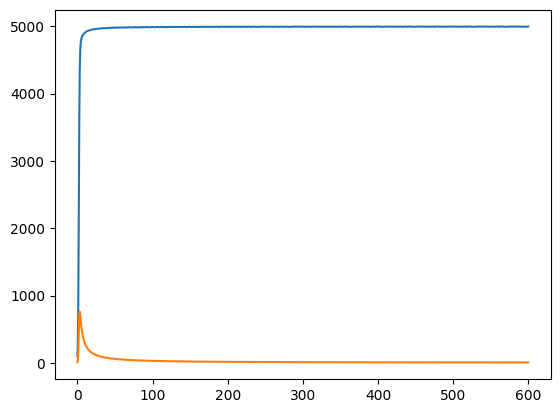

In [81]:
sd_sim = {
        "r_S" : 2.00        ,   # r_S   -5,10
        "r_C" : 2.50        ,   # r_C   -5,10
        "alpha_S" : 1.00        ,   # alpha_S   -1,2
        "alpha_C" : 0.30        ,   # alpha_C   -1,2
        "K" : 5000        ,   # K     5000
    }
fe_model = lambda t , P : ft.partial(f_model,**sd_sim)(t,P[0],P[1])

plData = sp.integrate.solve_ivp(fe_model,(0,600) , (100,10) )
plt.plot(plData.t,plData.y[0])
plt.plot(plData.t,plData.y[1])